In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime, random
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime

# Aufgabe 2

Bearbeiten Sie diese Aufgabe in der Programmiersprache Python und reichen Sie ein vollständiges Jupyter Notebook ein mit dem Dateinamen „web78_aufgabe_2.ipynb“ ab. Aus dem AKAD Online Bereich zu diesem Modul laden Sie die Datei "countries-aggregated.csv“ herunter. Der Datensatz enthält einen Auszug des aktuellen COVID 19 Datensatzes und beinhaltet. Sie finden eine Dokumentation des Datensatzes auch unter: 

https://github.com/datasets/covid-19. 

Beachten Sie, dass die Werte in den Spalten „Confirmed“, „Recovered“ und „Deaths“ kumulative sind. Das bedeutet, wenn zum Beispiel für das Land Deutschland am 13.4.2020 die Zahl 130072 in „Confirmed“ steht und am 14.4.2020 die Zahl 131359, dann bedeutet dies, dass es vom 13. auf den 14. April 1287 neue Fälle hinzugekommen sind (131359 – 130072). 

In [2]:
# Datensatz laden inkl. erste Analyse:
df = pd.read_csv("countries-aggregated.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71808 entries, 0 to 71807
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       71808 non-null  object
 1   Country    71808 non-null  object
 2   Confirmed  71808 non-null  int64 
 3   Recovered  71808 non-null  int64 
 4   Deaths     71808 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.7+ MB


In [3]:
# Datum in ein Datetime umwandeln:
df["Date"] = pd.to_datetime(df["Date"])

## Teilaufgabe 2a) Visualisierung des Infektionsgeschehens: 
Erstellen Sie eine geeignete Visualisierung die die Entwicklung der Fälle „Confirmed“, „Recovered“ und „Deaths“ über die Zeit für die Länder „US“, „India“, „United Kingdom“, 
„Germany“, „Italy“ und „Brazil“ widerspiegelt, so dass klar die verschiedenen Infektionswellen erkennbar sind. 

Um Infektionswellen erkennbar zu machen ist es notwendig, die neu hinzu gekommenen Fälle nicht kummuliert zu betrachten sondern einzeln. Die kumulierte Darstellung würde die Infektionswellen nicht eindeutig kenntlich machen. Es sind jeweils neue Spalten für "New Confimed", "New Recovered" und "New Deaths" notwendig.

In [4]:
for t in ["Confirmed", "Recovered", "Deaths"]:
    for i, row in df.iterrows():
        if i == 0 or row['Country'] != df.loc[i-1, 'Country']:
            value = row[t]
        else:
            value = max([0, row[t] - df.loc[i-1, t]])
        df.loc[i, f"New {t}"] = value

In [5]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,New Confirmed,New Recovered,New Deaths
0,2020-01-22,Afghanistan,0,0,0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,0,0,0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,0,0,0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,0,0,0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,0,0,0,0.0,0.0,0.0


In [6]:
countries = ['US', 'India', 'United Kingdom', 'Germany', 'Italy', 'Brazil']
df_countries = df[df['Country'].isin(countries)]
df_countries["Country"].unique()

array(['Brazil', 'Germany', 'India', 'Italy', 'US', 'United Kingdom'],
      dtype=object)

## Auffäligkeiten in den Daten:
- Einige "unnatürliche" Ausschläge bei "Recovered" sind erkennbar (z.B. Deutschland, Brasilien), vermutlich Fehler in der Datenübertragung. 
   > Beispiel (Recovery) für Deutschland: 2021-01-27,Germany,2179679,2043773,54498 
   und der Datensatz am Tag später: 2021-01-28,Germany,2194562,1915501,55883
  >> diese Zahlen wurden im Vorfeld bereinigt, damit Infektionswellen besser erkennbar werden.
- Der Einbruch in den Daten der "Recovered" Linie der US sind darauf zurück zu führen, dass es ab dem 2020-12-14 keine Daten mehr im Datensetz vorhanden waren.
- Großbritanien hat keine Zahlen vorliegen für geheilte Fälle

In [7]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
index_big_value = df_countries[(df_countries["Country"]=="Germany") & (df_countries["New Recovered"]>75000)].index
df_countries["New Recovered"][index_big_value] = 0
index_big_value = df_countries[(df_countries["Country"]=="Brazil") & (df_countries["New Recovered"]>200000)].index
df_countries["New Recovered"][index_big_value] = 0

### Annahme:
Die Darstellung in nur einer einzelnen Visualisierung wäre unübersichtlich, da die Zahlen jeweils steigen und wieder fallen, da die Meldungen der COVID-Fälle meist über Wochenenden nicht zuverlässig war.

Aus diesem Grund werden die Zahlen der jeweiligen Länder einzeln dargestellt.

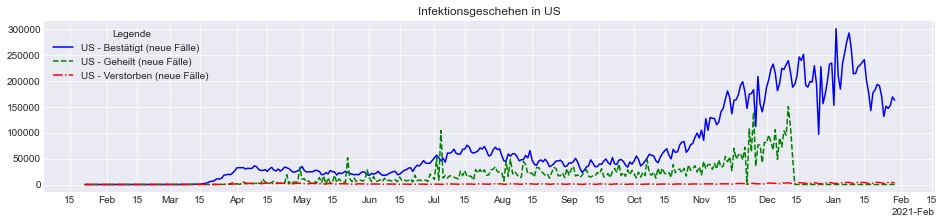

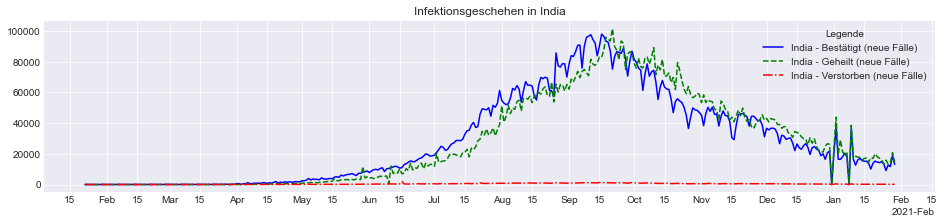

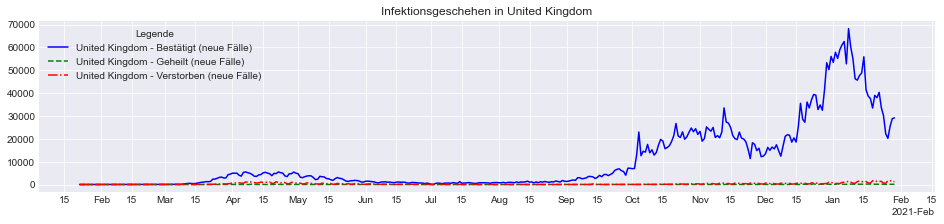

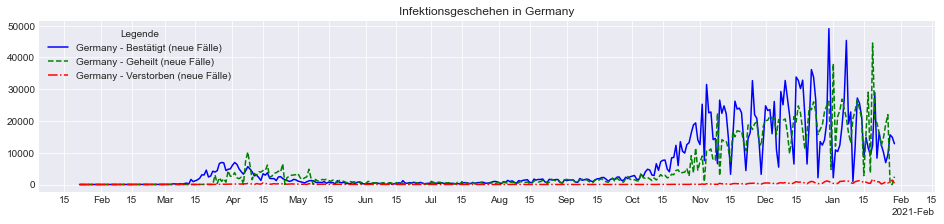

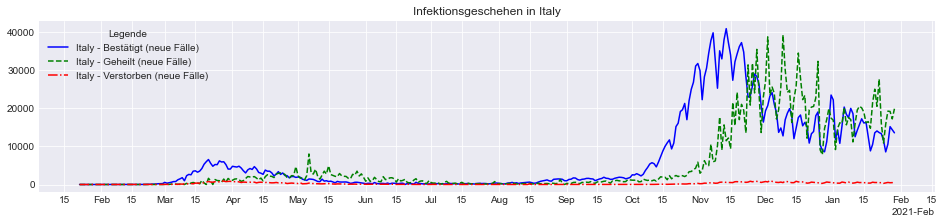

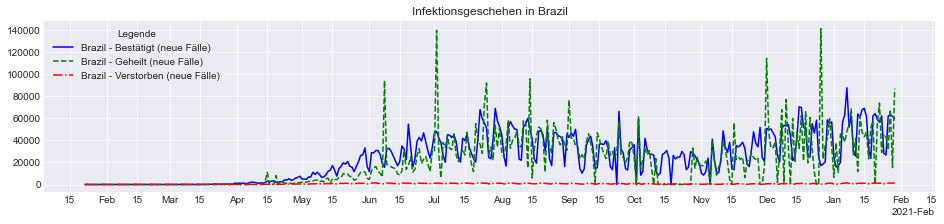

In [8]:
base = datetime.datetime(2005, 2, 1)
dates = df_countries["Date"].unique()
dict_country_dfs = dict()

for c in countries:
    dfc = df_countries[df_countries['Country']==c]
    dict_country_dfs[c] = dfc

plt.style.use('seaborn-darkgrid')

for c in countries:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(13, 3))
    locator = mdates.AutoDateLocator(minticks=len(dates))
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_title('Bestätigte Covid-Fälle im Zeitraum von X bis X'.format("seaborn-v0_8"))
    legend = list()

    dfc = dict_country_dfs[c]
    ax.plot(dates, dfc["New Confirmed"],'b-', label =f"{c} - Bestätigt")
    ax.plot(dates, dfc["New Recovered"],'g--', label =f"{c} - Geheilt")
    ax.plot(dates, dfc["New Deaths"],'r-.', label =f"{c} - Verstorben")
    
    legend.append(f"{c} - Bestätigt (neue Fälle)")
    legend.append(f"{c} - Geheilt (neue Fälle)")
    legend.append(f"{c} - Verstorben (neue Fälle)")
    ax.set_title(f"Infektionsgeschehen in {c}")
    plt.legend(legend, title = "Legende")

Eine zusätzliche Grafik, die das Infektionsgeschehen am besten für alle Länder darstellt ist die folgende. Hier eignet sich der Wert für "Bestätigt" am besten.

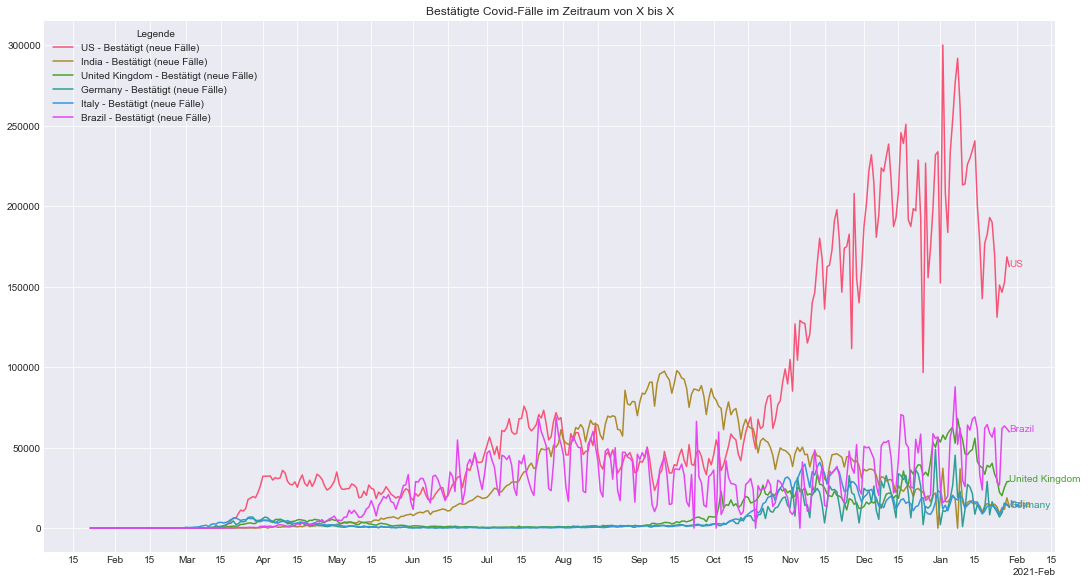

In [9]:
base = datetime.datetime(2005, 2, 1)
dates = df_countries["Date"].unique()
dict_country_dfs = dict()

for c in countries:
    dfc = df_countries[df_countries['Country']==c]
    dict_country_dfs[c] = dfc
    
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(constrained_layout=True, figsize=(15, 8))
palette = iter(sns.husl_palette(l=.6))
legend = list()
color_id = 0

for c in countries:
    locator = mdates.AutoDateLocator(minticks=len(dates))
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_title('Bestätigte Covid-Fälle im Zeitraum von X bis X'.format("seaborn-v0_8"))
    
    dfc = dict_country_dfs[c]
    col = next(palette)
    ax.plot(dates, dfc["New Confirmed"], '-', label =f"{c} - Bestätigt", color=col)
    
    x = dict_country_dfs[c]["Date"].iloc[-1]
    y = dict_country_dfs[c]["New Confirmed"].iloc[-1]
    ax.annotate(c, xy=(x,y), color=col)
    color_id += 1
    legend.append(f"{c} - Bestätigt (neue Fälle)")
    
plt.legend(legend, title = "Legende")

## Teilaufgabe 2b) Geografische Visualisierung der Covid Ausbreitung: 
Erstellen Sie darüber hinaus eine geografische Repräsentation der Covid Infektionen „Confirmed“ für den Stichtag 20.12.2020 für die 30 Länder mit den höchsten Infektionszahlen. 
 
Beispielhaft ist dies hier mit einem Land illustriert, wobei die Größe der „Bubble“ die Anzahl der Infektionen widerspiegelt. Zur Erleichterung finden im Akad Online Bereich zu diesem Modul die Datei „countries.xls“ in der die Lägen- und Breitenrade für jedes Land erhalten sind. 

Im Begleitbuch haben Sie die Bibliothek „basemap“ kennengelernt. Diese wird allerdings nicht weitergeführt, wie Sie auf der offiziellen Internetseite nachlesen können: 

https://matplotlib.org/basemap/. 

Die Nachfolgerbibliothek ist „cartopy“. Installieren Sie die Bibliothek gemäß den Anweisungen auf https://scitools.org.uk/cartopy/docs/latest/ und schauen Sie sich die Beispiele an: https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

In [10]:
# Relevantes Daten in eigenes dataframe auslagern:
df_confirmed_201220 = df[df['Date'] == datetime.datetime(2020, 12, 20)][["Date", "Country", "Confirmed"]]

In [11]:
# Geodaten auslesen
df_geo = pd.read_excel("countries.xls")
df_geo.head()

,Code,Latidude,Longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [12]:
# beide dictionaries verknüpfen:
df_confirmed_201220 = pd.merge(df_confirmed_201220, df_geo, on = "Country", how = "inner")

In [13]:
df_confirmed_201220 = df_confirmed_201220.sort_values(by='Confirmed', ascending=False)
df_confirmed_201220.head(30)

,Date,Country,Confirmed,Code,Latidude,Longitude
70,2020-12-20,India,10055560,IN,20.593684,78.962880
23,2020-12-20,Brazil,7238600,BR,-14.235004,-51.925280
130,2020-12-20,Russia,2821125,RU,61.524010,105.318756
54,2020-12-20,France,2529756,FR,46.227638,2.213749
166,2020-12-20,United Kingdom,2046161,GB,55.378051,-3.435973
162,2020-12-20,Turkey,2024601,TR,38.963745,35.243322
76,2020-12-20,Italy,1953185,IT,41.871940,12.567380
148,2020-12-20,Spain,1797236,ES,40.463667,-3.749220
6,2020-12-20,Argentina,1541285,AR,-38.416097,-63.616672
58,2020-12-20,Germany,1514962,DE,51.165691,10.451526


In [14]:
# Latidude und Longitude in Integer umwandeln:
df_confirmed_201220["Latidude"] = df_confirmed_201220["Latidude"].apply(lambda x: int(x))
df_confirmed_201220["Longitude"] = df_confirmed_201220["Longitude"].apply(lambda x: int(x))
df_confirmed_201220.head()

,Date,Country,Confirmed,Code,Latidude,Longitude
70,2020-12-20,India,10055560,IN,20,78
23,2020-12-20,Brazil,7238600,BR,-14,-51
130,2020-12-20,Russia,2821125,RU,61,105
54,2020-12-20,France,2529756,FR,46,2
166,2020-12-20,United Kingdom,2046161,GB,55,-3


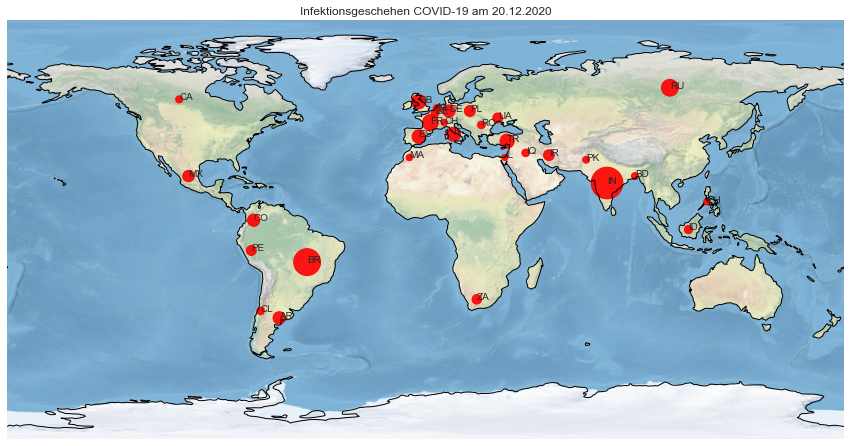

In [15]:
import cartopy.crs as ccrs

plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_title(f'Infektionsgeschehen COVID-19 am 20.12.2020')

df_plot = df_confirmed_201220.head(30)

plt.scatter(x=df_plot["Longitude"], 
            y=df_plot["Latidude"],
            color="red",
            s=df_plot["Confirmed"]/10000,
            alpha=0.9)
    
for i, row in df_plot.iterrows():
    ax.annotate(row["Code"], xy=(row["Longitude"], row["Latidude"]))

plt.show()